# 연구 :  CKD 환자에서 CLI/PAD 유무에 따른 변수 분석

# 분석1 : CLI 에 따른 Demographic data 분석

## Table of Contents

* [데이터전처리](#데이터-전처리)
    : 딱히 보실 필요 없는 부분입니다
* [분석1 : CLI 에 따른 demographic data](#분석-1)
    * [데이터 탐색](#Demographic-data-살펴보기)
    * [데이터 검정](#Demographic-data-검정)
    * [검정결과](#Demographic-Data-검정-결과)
* [Logistic regression](#[부가내용]-심심해서-해보는-logistic-regression)
    * [변수간 상관관계](#변수들의 상관관계)
    * [모델적합](#모델-적합)
    * [회귀결론](#결론)
* [요약](#요약)

### Study group의 구분
Column G 는 CKD without CLI 인 환자 및 CKD with CLI 환자를 구분한 Group 입니다.
- Group 3: CKD 3 without CLI
- Group 4: CKD 4 without CLI
- Group 5: CKD 5 without CLI 
- Group 6: CKD 3 with CLI
- Group 7: CKD 4 with CLI
- Group 8: CKD 5 with CLI 

#### 1) 분석 1 

CLI 유무에 따른 demographic data (Gender, Age, DM, HTN, ACS, CHF, CVA, Smoking, Alcohol, BMI, Statin 복용) 의 차이를 보는 것이 분석 1 입니다.  

즉 [Group 3+4+5]와 [Group 6+7+8] 의 상기 변수의 차이를 통계적으로 분석하는 것이 필요합니다. 


---

# 데이터 전처리

데이터를 불러와서 사용가능한 형태로 수정 후 확인

**불완전한 데이터는 제거** 후 사용하였습니다. 150개 행 중에서 17개 정도로 분석 결과에 크게 영향을 미치는 것은 아닌 것으로 보입니다. 

In [42]:
# 데이터 불러오기
library(xlsx)
data <- read.xlsx("../EPCinCKD_201802.xlsx", sheetIndex = 1)
# 필요한 데이터만 추출(이름, ID 제거, 150행까지)
data <- data[1:150,-c(1,2)]
data <- data[complete.cases(data),]

In [43]:
# Column name 변경
colnames(data)[c(7, 13, 15, 16, 22)] <- c("HTN", "statin", "obesity", "PAD", "CD34.All")
head(data)
tail(data)
colnames(data)

Gender,Age,Birth.Date,CKD.class,Group,DM,HTN,ACS,CHF,CVA,⋯,obesity,PAD,Average.CFU,VEGF,CD34.VEGF,CD34,VEGF.All,CD34.All,VEGF.1,SDF.1
0,49.00000,1961-10-12,3,3,0,1,0,0,0,⋯,0,0,3.789457,1.450,0.1900,2.1000,1.6400,2.2900,31.432,1933.688
0,64.63611,1946-11-05,3,3,0,1,0,0,1,⋯,0,0,4.392872,6.674,0.1645,-0.0390,6.8385,0.1255,2.563,2139.464
0,38.88056,1972-03-02,3,3,0,0,0,0,0,⋯,0,0,3.704475,7.654,0.1715,0.4345,7.8255,0.6060,54.338,3092.584
1,61.50000,1949-12-08,3,3,1,1,0,0,0,⋯,1,0,6.167245,12.907,0.1740,0.2595,13.0810,0.4335,38.010,1877.869
1,69.29722,1942-05-07,3,3,0,1,0,0,0,⋯,1,0,5.879595,2.887,0.4690,-0.0955,3.3560,0.3735,81.725,1902.396
1,74.65000,1936-11-29,3,3,0,1,0,0,0,⋯,0,0,3.929069,5.296,0.1880,0.1035,5.4840,0.2915,195.327,2223.454


,Gender,Age,Birth.Date,CKD.class,Group,DM,HTN,ACS,CHF,CVA,⋯,obesity,PAD,Average.CFU,VEGF,CD34.VEGF,CD34,VEGF.All,CD34.All,VEGF.1,SDF.1
144,1,63,1947-01-13,5,8,1,0,0,1,0,⋯,0,1,5.034,0.3595,0.2075,0.0470,0.5670,0.2545,127.070,3792.843
145,0,56,1954-07-15,5,8,1,1,1,0,0,⋯,0,1,3.044,0.3865,0.0875,0.0035,0.4740,0.0910,231.768,4313.722
146,1,63,1947-06-15,5,8,1,0,0,0,0,⋯,1,1,5.090,4.1670,0.2255,-0.0055,4.3925,0.2200,495.291,5311.477
147,0,71,1938-11-08,5,8,1,1,0,0,0,⋯,1,1,5.690,1.2190,0.1255,0.1955,1.3445,0.3210,62.777,3311.798
148,0,70,1940-01-20,5,8,1,1,1,0,1,⋯,1,1,5.554,1.7870,0.0795,-0.0045,1.8665,0.0750,277.927,7015.030
149,1,71,1940-10-08,5,8,1,1,0,0,0,⋯,0,1,3.684,2.1200,2.6090,10.3900,4.7290,12.9990,500.290,3461.473


[1] "Gender"      "Age"         "Birth.Date"  "CKD.class"   "Group"      
 [6] "DM"          "HTN"         "ACS"         "CHF"         "CVA"        
[11] "smoking"     "alcohol"     "statin"      "BMI"         "obesity"    
[16] "PAD"         "Average.CFU" "VEGF"        "CD34.VEGF"   "CD34"       
[21] "VEGF.All"    "CD34.All"    "VEGF.1"      "SDF.1"

- 잘 불려온 것을 확인할 수 있다. 

In [44]:
# 범주형 변수, 데이터 타입 변경
# data$Gender <- factor(data$Gender, levels=c(0,1), labels =c("F","M"))

# for( key in c('DM', 'HTN', 'ACS', 'CHF', 'CVA', 'smoking', 'alcohol', 'statin', 'obesity', 'PAD') ){
#     data[key][,1] <- factor(data[key][,1])
# }

다음 코드는 

CLI 그룹에 따라 3,4,5 는 0 / 6,7,8 은 1 로 하는 CLI 변수 생성

In [83]:
library(dplyr)

# CLI 변수 생성 : 0 = CLI 없음(Group3,4,5) / 1 = CLI 있음(Group6,7,8)
data <- data %>% mutate( CLI = as.numeric(Group>5))

# 생성된 데이터 확인
data  %>% group_by(CKD.class, CLI)  %>% summarise(n=length(CLI))

CKD.class,CLI,n
3,0,41
3,1,11
4,0,33
4,1,7
5,0,27
5,1,14


---
# 분석 1
---
### CLI 집단과 비 CLI 집단 사이의 demographic 수치 비교

범주형 : Gender, DM, HTN, ACS, CHF, CVA, Smoking, Alcohol, obesity(BMI 기준 비만여부), Statin
    
    => Chi-square 분석

연속형 : Age, BMI

    => t-test or Wilcoxon-test


## Demographic data 살펴보기

CLI 유무를 기준으로 나눈 집단에서 

Gender, Age, DM, HTN, ACS, CHF, CVA, Smoking, Alcohol, BMI, Statin 데이터를 확인합니다. 

#### Mean과 Ratio 확인

CLI/비CLI 집단에서 각 변수의 비율과 평균을 확인합니다. 

아래 코드 신경쓰실 필요 없고, 결과만 보시면 됩니다. 


CLI(group6+7+8) number :  32 /  133 


<CLI 그룹에 따른 Demographic data 비교>


CLI,gender.ratio,mean.Age,DM.ratio,HTN.ratio,ACS.ratio,CHF.ratio,CVA.ratio,smoking.ratio,alcohol.ratio,statin.ratio,mean.BMI,obesity.ratio,PAD.ratio
0,0.51,62.84,0.39,0.92,0.12,0.03,0.11,0.44,0.26,0.56,23.94,0.37,0.26
1,0.75,67.09,0.94,0.72,0.31,0.06,0.16,0.28,0.06,0.06,23.35,0.44,1.00




<CLI 그룹에 따른 Demographic data 시각화>


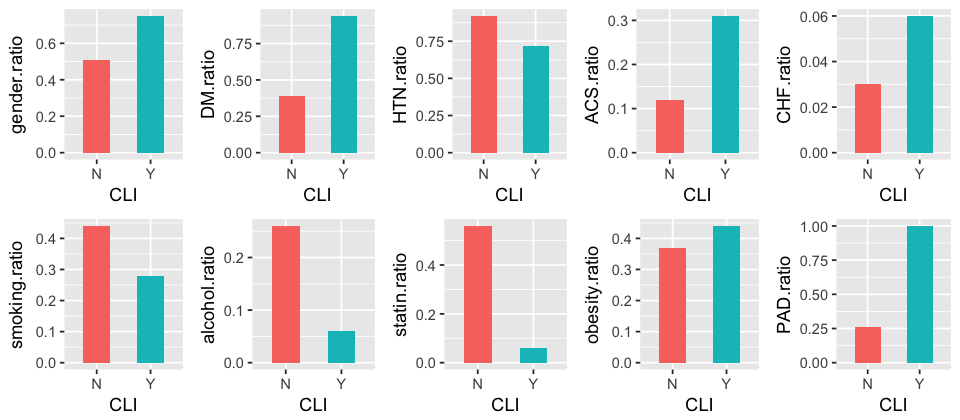

In [85]:
# CLI 데이터 수 
cat( "\nCLI(group6+7+8) number : ", sum(data$CLI), "/ ", length(data$CLI),"\n")

library(dplyr)
library(ggplot2)

# Demographic data
cat("\n\n<CLI 그룹에 따른 Demographic data 비교>\n")
demo.data <- data %>% 
    group_by( CLI ) %>%
    summarise( gender.ratio = mean(Gender, na.rm = T),
            mean.Age = mean(Age, na.rm = T),
            DM.ratio = mean(DM, na.rm = T),
            HTN.ratio = mean(HTN, na.rm = T),
            ACS.ratio = mean(ACS, na.rm = T),
            CHF.ratio = mean(CHF, na.rm = T),
            CVA.ratio = mean(CVA, na.rm = T),
            smoking.ratio = mean(smoking, na.rm = T),
            alcohol.ratio = mean(alcohol, na.rm = T),
            statin.ratio = mean(statin, na.rm = T),
            mean.BMI = mean(BMI, na.rm = T),
            obesity.ratio = mean(obesity, na.rm = T),
            PAD.ratio = mean(PAD, na.rm = T)
             ) %>%
    mutate_if(is.numeric, funs(round(., 2)))

demo.data

library(gridExtra)
library(repr)
plots <- list()  # new empty list

for (key in c("gender.ratio", "DM.ratio", "HTN.ratio", "ACS.ratio","CHF.ratio","smoking.ratio","alcohol.ratio","statin.ratio", "obesity.ratio", "PAD.ratio")) {
    p1 <- demo.data %>% mutate(CLI = as.factor(CLI)) %>% 
        ggplot(aes_string(x="CLI", y=key, fill="CLI")) +
        geom_bar(stat="identity", width=0.5) +
        scale_x_discrete("CLI", breaks= c(0,1), labels = c("N","Y"))+ 
        guides(fill=FALSE)
    plots[[key]] <- p1  # add each plot into plot list
}

options(repr.plot.width=8, repr.plot.height=3.5)
cat("\n\n<CLI 그룹에 따른 Demographic data 시각화>\n")
grid.arrange(grobs=plots, ncol=5)

비율 차이

- 1.5배 정도: gender, smoking
- 2배 이상: DM, CHF, alcohol, statin PAD


#### Age 와 BMI 의 분포 확인 

Age 와 BMI 는 연속형 자료이므로, t-test를 실시하기 전에 정규성을 확인해주는 것이 좋습니다. 

우선 분포를 살펴봅니다. 



<Age, BMI 분포 그래프>

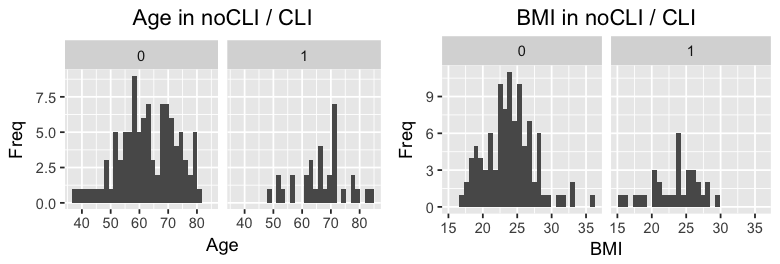

In [47]:
# 연속형 데이터 분포 확인
library(repr)
library(ggplot2)
library(gridExtra)

# CLI 집단에 따른 Age 분포 확인 
p1 <- data %>% 
    ggplot(aes(x=Age)) +
    geom_histogram(bins=30, na.rm = T) +  
    ggtitle("Age in noCLI / CLI") +
    labs(x="Age", y="Freq") +
    theme(plot.title = element_text(hjust = 0.5)) + 
    facet_wrap(~ CLI)

# 겹친 그래프
# data %>% 
#     mutate(CLI.f = as.factor(CLI)) %>%
#     ggplot(aes(x=Age, fill = CLI.f)) +
#     geom_histogram(alpha=0.5, position="identity", binwidth = 2.5) +  
#     ggtitle("Age in noCLI / CLI") +
#     labs(x="Age", y="Freq") +
#     theme(plot.title = element_text(hjust = 0.5))

# CLI 집단에 따른 BMI 분포 확인
p2 <- data %>% 
    ggplot(aes(x=BMI)) +
    geom_histogram(bins=30, na.rm = T) +  
    ggtitle("BMI in noCLI / CLI") +
    labs(x="BMI", y="Freq") +
    theme(plot.title = element_text(hjust = 0.5)) + 
    facet_wrap(~ CLI)

# 겹친 그래프
# data %>% 
#     mutate(CLI.f = as.factor(CLI)) %>%
#     ggplot(aes(x=BMI, fill = CLI.f)) +
#     geom_histogram(alpha=0.5, position="identity",binwidth = 1) +  
#     ggtitle("BMI in noCLI / CLI") +
#     labs(x="BMI", y="Freq") +
#     theme(plot.title = element_text(hjust = 0.5))

cat("\n\n<Age, BMI 분포 그래프>")
options(repr.plot.width=6.5, repr.plot.height=2.2)
grid.arrange(p1, p2, ncol=2)

CLI 그룹과 비 CLI 그룹에서 분포의 큰 차이는 없어보입니다.  
정규성을 따르는지 조금 더 확실하게 따져 봅시다. 

#### Age 정규성


 <Age 정규성 검정>


CLI,Age정규성_p.value
0,0.1018635
1,0.5999410


  등분산성 검정 p-value :  0.435332

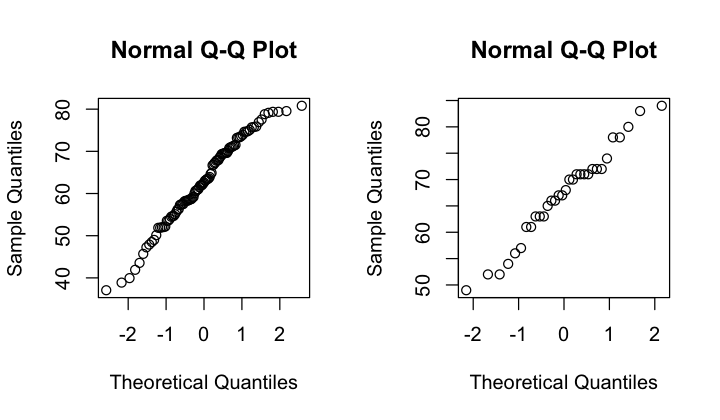

In [48]:
options(repr.plot.width=6, repr.plot.height=3.5)
par(mfrow = c(1, 2))
p1 <- data %>% filter(CLI==0) %>% with(qqnorm(Age))
p2 <- data %>% filter(CLI==1) %>% with(qqnorm(Age))

result <- data %>% group_by(CLI)%>% summarise(Age정규성_p.value = shapiro.test(Age)$p.value)
var.anal <- var.test(data$Age ~ data$CLI)

cat("\n <Age 정규성 검정>\n")
result
cat("  등분산성 검정 p-value : ", var.anal$p.value)

정규성 만족 => t-test

#### BMI 정규성


 <BMI 정규성 검정>


CLI,BMI정규성_p.value
0,0.03783754
1,0.36165338


  등분산성 검정 p-value :  0.8645835

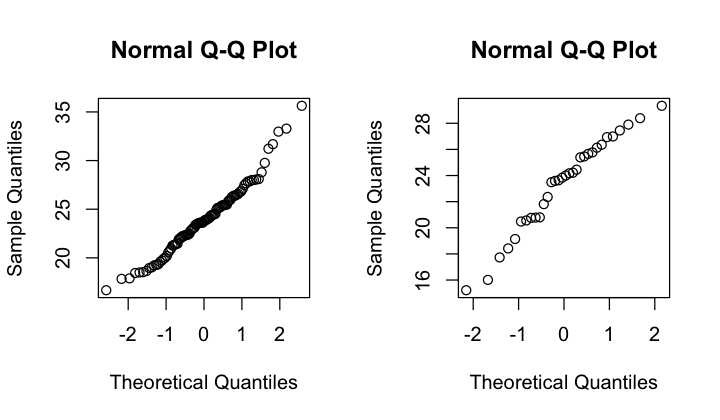

In [49]:
options(repr.plot.width=6, repr.plot.height=3.5)
par(mfrow = c(1, 2))
p1 <- data %>% filter(CLI==0) %>% with(qqnorm(BMI))
p2 <- data %>% filter(CLI==1) %>% with(qqnorm(BMI))

result <- data %>% group_by(CLI)%>% summarise(BMI정규성_p.value = shapiro.test(BMI)$p.value)
var.anal <- var.test(data$BMI ~ data$CLI)

cat("\n <BMI 정규성 검정>\n")
result
cat("  등분산성 검정 p-value : ", var.anal$p.value)

정규성 살짝 어긋남 => wilcoxon

## Demographic data 검정

### BMI, Age 차이 검정

그렇다면 CLI/ non-CLI 집단에서 BMI 차이가 있는지 test를 실시해보자 

In [50]:
#Age.result <- wilcox.test(Age~CLI, data = data)
BMI.result <- wilcox.test(BMI~CLI, data = data)
Age.result <- t.test(Age~CLI, data = data) # 어차피 유의하지 않긴 함
#BMI.result <- t.test(BMI~CLI, data = data)

cat("\nAge에 대한 Wilcoxon-test 결과 : p-value =", Age.result$p.value)
cat("\nBMI에 대한 t-test 결과 : p-value =", BMI.result$p.value)



Age에 대한 Wilcoxon-test 결과 : p-value = 0.02625301
BMI에 대한 t-test 결과 : p-value = 0.7661559

Age 에 차이가 있다. 

### 범주형 데이터 검정

Gender, DM, HTN, ACS, CHF, CVA, Smoking, Alcohol, obesity(BMI 기준 비만여부), Statin 에 대한 차이 검정을 실시해보자

=> Chisq 검정

In [51]:
# Chisq test for tabular data

for(key in c("Gender","DM", "HTN", "ACS", "CHF", "CVA", "smoking", "alcohol", "statin", "obesity", "PAD")){
    test <- chisq.test(data[key][,1], data["CLI"][,1])
    cat("\n", key, "result : p-value =", round(test$p.value, 3), '\n')
}


 Gender result : p-value = 0.033 

 DM result : p-value = 0 


Warning message in chisq.test(data[key][, 1], data["CLI"][, 1]):
“Chi-squared approximation may be incorrect”


 HTN result : p-value = 0.007 

 ACS result : p-value = 0.022 


Warning message in chisq.test(data[key][, 1], data["CLI"][, 1]):
“Chi-squared approximation may be incorrect”


 CHF result : p-value = 0.751 


Warning message in chisq.test(data[key][, 1], data["CLI"][, 1]):
“Chi-squared approximation may be incorrect”


 CVA result : p-value = 0.685 

 smoking result : p-value = 0.178 

 alcohol result : p-value = 0.035 

 statin result : p-value = 0 

 obesity result : p-value = 0.608 

 PAD result : p-value = 0 


유의미한 결과
- Gender 0.033
- DM 0.0000
- HTN 0.007
- ACS 0.022
- alcohol 0.035
- statin 0.000
- PAD 0.000

그런데 HTN, CHF 와 CVA 은 표본 수가 적어, 경고가 떴으므로 
Fisher's exact test 를 하는 것이 좋겠다. 

In [52]:
HTN.result <- fisher.test(data$HTN, data$CLI)
CHF.result <- fisher.test(data$CHF, data$CLI)
CVA.result <- fisher.test(data$CVA, data$CLI)

cat("\nFisher's Exact Test\n",
    "\n  HTN : p-value =", HTN.result$p.value,
    "\n  CHF : p-value =", CHF.result$p.value,
    "\n  CVA : p-value =", CVA.result$p.value
   )


Fisher's Exact Test
 
  HTN : p-value = 0.005648711 
  CHF : p-value = 0.5934886 
  CVA : p-value = 0.5345315

앞의 결과와 달라지는 것은 없다. 

## Demographic Data 검정 결과

Gender, Age, DM, HTN, ACS, CHF, CVA, Smoking, Alcohol, BMI, Statin 복용 중 

두 집단에서 차이가 나는 사항들은 

- Age 0.026
- Gender 0.033
- DM 0.000
- HTN 0.006
- ACS 0.022
- alcohol 0.035
- statin 0.000
- PAD 0.000

이다. 

다중분석을 고려하더라도, DM, HTN, statin, PAD 는 거의 확실하게 차이가 나는 것으로 생각된다. 
    
    => 확인 필요한 부분

In [86]:
diff.data <- data %>% 
    group_by( CLI ) %>%
    summarise( mean.Age = mean(Age, na.rm = T),
            Gender.ratio = mean(Gender, na.rm = T),
            DM.ratio = mean(DM, na.rm = T),
            HTN.ratio = mean(HTN, na.rm = T),
            ACS.ratio = mean(ACS, na.rm = T),
            alcohol.ratio = mean(alcohol, na.rm = T),
            statin.ratio = mean(statin, na.rm = T),
            PAD.ratio = mean(PAD, na.rm = T)
             ) %>%
    mutate_if(is.numeric, funs(round(., 2)))

diff.data

CLI,mean.Age,Gender.ratio,DM.ratio,HTN.ratio,ACS.ratio,alcohol.ratio,statin.ratio,PAD.ratio
0,62.84,0.51,0.39,0.92,0.12,0.26,0.56,0.26
1,67.09,0.75,0.94,0.72,0.31,0.06,0.06,1.00


# [부가내용] 심심해서 해보는 logistic regression

### 변수들의 상관관계


<상관관계 표와 Heat map>


,DM,HTN,ACS,CHF,CVA,smoking,alcohol,statin,obesity,PAD
DM,1,-0.01,0.23,0.03,0.08,0.08,0.02,-0.14,0.08,0.48
HTN,NA,1.00,0.05,-0.16,0.00,0.08,0.09,0.12,0.16,-0.07
ACS,NA,NA,1.00,0.02,0.08,0.05,-0.08,-0.03,-0.02,0.26
CHF,NA,NA,NA,1.00,0.17,0.00,-0.10,-0.02,0.01,0.07
CVA,NA,NA,NA,NA,1.00,0.03,-0.08,-0.05,0.14,0.09
smoking,NA,NA,NA,NA,NA,1.00,0.41,-0.02,0.12,0.09
alcohol,NA,NA,NA,NA,NA,NA,1.00,0.06,0.05,-0.01
statin,NA,NA,NA,NA,NA,NA,NA,1.00,0.14,-0.27
obesity,NA,NA,NA,NA,NA,NA,NA,NA,1.00,0.12
PAD,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.00


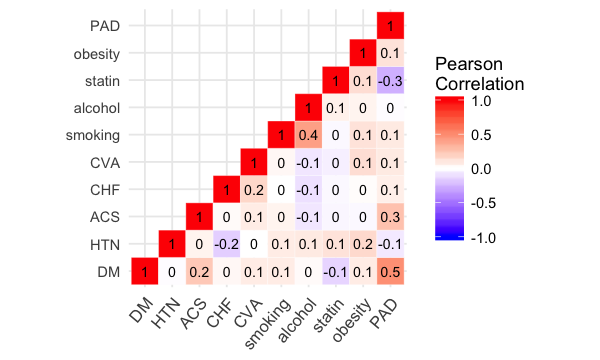

In [54]:
# 상관 계수를 살펴보자 

library(reshape2)

cormat <- round(cor(data[c(6:13,15,16)], use = 'complete.obs'),2)
cormat[lower.tri(cormat)] <- NA

cat("\n<상관관계 표와 Heat map>\n")
cormat
melted_cormat <- melt(cormat, na.rm = TRUE)

options(repr.plot.width=5, repr.plot.height=3)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
    geom_tile(color = "white")+
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                         midpoint = 0, limit = c(-1,1), space = "Lab", 
                         name="Pearson\nCorrelation") +
    theme_minimal()+ 
    theme(axis.text.x = element_text(angle = 50, vjust = 1, 
                                     size = 10, hjust = 1) , 
          axis.title.x=element_blank(), 
          axis.title.y=element_blank())+
    coord_fixed() + geom_text(aes(Var2, Var1, label = round(value,1)), color = "black", size = 3)

관련성이 있어보이는 변수들은 다음과 같다. 
- PAD와 DM : 0.47
- smoking 과 alcohol : 0.42
- statin과 PAD : -0.29
- ACS와 PAD : 0.24
- ACS와 DM : 0.21


### 모델 적합

우선 앞에서 차이가 있는 것으로 보였던 

- Age 0.026
- Gender 0.033
- DM 0.000
- HTN 0.006
- ACS 0.022
- alcohol 0.035
- statin 0.000
- PAD 0.000

**Age, Gender, DM, HTN, ACS, alcohol, statin, PAD**를 모두 넣고 적합해보자 

In [55]:
model <- glm(CLI ~ Age + Gender + DM + HTN + ACS + alcohol + statin + PAD, family = binomial(),data = data)
summary(model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = CLI ~ Age + Gender + DM + HTN + ACS + alcohol + 
    statin + PAD, family = binomial(), data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.064   0.000   0.000   0.000   1.844  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -32.83642 6757.83007  -0.005   0.9961  
Age           -0.07054    0.07352  -0.959   0.3373  
Gender         0.98794    1.10182   0.897   0.3699  
DM            21.23822 4298.13382   0.005   0.9961  
HTN          -40.65355 7159.81125  -0.006   0.9955  
ACS            0.80343    1.31884   0.609   0.5424  
alcohol       -3.70282    1.48015  -2.502   0.0124 *
statin        -3.39056    1.38359  -2.451   0.0143 *
PAD           58.27734 8857.60485   0.007   0.9948  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.77  on 132  degrees of freedom
Residual deviance:  27.85  on 124  degrees of fre

DM 과 PAD 의 공선성이 강하고(상관계수0.5),

PAD는 사실 Demographic data 에서 고려하려던 변수가 아니었으므로, 
이를 제외하고 모형을 적합해보자. 

#### PAD 제거 모델 

In [56]:
model <- glm(CLI ~ Age + Gender + DM + HTN + ACS + alcohol + statin , family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ Age + Gender + DM + HTN + ACS + alcohol + 
    statin, family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.95518  -0.25822  -0.09972  -0.01466   2.59724  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.16893    2.53623  -1.644 0.100227    
Age          0.04561    0.03459   1.319 0.187285    
Gender       1.10917    0.71211   1.558 0.119329    
DM           4.22294    1.13229   3.730 0.000192 ***
HTN         -3.28703    1.18336  -2.778 0.005474 ** 
ACS          1.38292    0.96245   1.437 0.150755    
alcohol     -1.67297    0.93834  -1.783 0.074602 .  
statin      -3.81379    1.04621  -3.645 0.000267 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  61.571  on 125  degrees of freedom
AIC: 77.571

Number of Fisher Sc

#### Age 제거 모델

가장 유의미하지 않은 Age 을 제거하고 모델을 다시 세워보자 

In [87]:
model <- glm(CLI ~ Gender + DM + HTN + ACS + alcohol + statin , family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ Gender + DM + HTN + ACS + alcohol + statin, 
    family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.16777  -0.28337  -0.11568  -0.01785   2.41324  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.2341     1.0238  -1.205 0.228061    
Gender        1.2504     0.6976   1.793 0.073049 .  
DM            4.0799     1.0717   3.807 0.000141 ***
HTN          -3.2114     1.1547  -2.781 0.005417 ** 
ACS           1.3645     0.9531   1.432 0.152267    
alcohol      -1.8087     0.9265  -1.952 0.050927 .  
statin       -3.7408     1.0453  -3.579 0.000345 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.77  on 132  degrees of freedom
Residual deviance:  63.40  on 126  degrees of freedom
AIC: 77.4

Number of Fisher Scoring iterations: 7


ACS가 유의하지 않다. 


#### ACS 제거 모델 

In [88]:
model <- glm(CLI ~ Gender + DM + HTN + alcohol + statin , family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ Gender + DM + HTN + alcohol + statin, family = binomial(), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.72922  -0.33943  -0.12125  -0.02179   2.71150  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.3565     1.0278  -1.320  0.18688    
Gender        1.4555     0.6810   2.137  0.03258 *  
DM            4.0664     1.0214   3.981 6.86e-05 ***
HTN          -2.9242     1.0802  -2.707  0.00679 ** 
alcohol      -2.0841     0.9207  -2.264  0.02360 *  
statin       -3.4361     0.9840  -3.492  0.00048 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  65.687  on 127  degrees of freedom
AIC: 77.687

Number of Fisher Scoring iterations: 7


#### 가능도비 검정 

Age, ACS 를 포함시킬때와 안시킬때에 대해서 가능도비 검정을 실시하면 다음과 같다. 

In [90]:
library(lmtest)
model1 <- glm(CLI ~ Gender + DM + HTN + alcohol + statin, family = binomial(),data = data)
model2 <- glm(CLI ~ Gender + DM + HTN + alcohol + statin + ACS + Age, family = binomial(),data = data)
lrtest(model1, model2)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
6,-32.84357,NA,NA,NA
8,-30.78540,2,4.11634,0.1276874


Age, ACS 는 포함시키지 않아도 괜찮겠다. 

#### DM + HTN + statin 모델

In [60]:
model <- glm(CLI ~ DM + HTN + statin , family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + statin, family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.34019  -0.30181  -0.21145  -0.03805   2.49468  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.9767     0.8740  -1.117  0.26379    
DM            4.1643     1.0449   3.985 6.74e-05 ***
HTN          -2.8127     1.0163  -2.768  0.00565 ** 
statin       -3.4411     0.9075  -3.792  0.00015 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.77  on 132  degrees of freedom
Residual deviance:  74.61  on 129  degrees of freedom
AIC: 82.61

Number of Fisher Scoring iterations: 7


### 여러가지 모델 살펴보기

In [61]:
library(leaps)
df <- data[,c(1,2,6:15, 25)]
b <- regsubsets(CLI ~. , data=df, nvmax = 20)
summary(b)

Subset selection object
Call: regsubsets.formula(CLI ~ ., data = df, nvmax = 20)
12 Variables  (and intercept)
        Forced in Forced out
Gender      FALSE      FALSE
Age         FALSE      FALSE
DM          FALSE      FALSE
HTN         FALSE      FALSE
ACS         FALSE      FALSE
CHF         FALSE      FALSE
CVA         FALSE      FALSE
smoking     FALSE      FALSE
alcohol     FALSE      FALSE
statin      FALSE      FALSE
BMI         FALSE      FALSE
obesity     FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: exhaustive
          Gender Age DM  HTN ACS CHF CVA smoking alcohol statin BMI obesity
1  ( 1 )  " "    " " "*" " " " " " " " " " "     " "     " "    " " " "    
2  ( 1 )  " "    " " "*" " " " " " " " " " "     " "     "*"    " " " "    
3  ( 1 )  " "    " " "*" "*" " " " " " " " "     " "     "*"    " " " "    
4  ( 1 )  " "    " " "*" "*" " " " " " " " "     "*"     "*"    " " " "    
5  ( 1 )  "*"    " " "*" "*" " " " " " " "*"     " "     "*"    " " 

위 내용과 여러 분석을 거친 결과 

CLI에 따른 집단 사이에서 

3개 변수 **DM, statin, HTN** 은 매우 확실한 차이가 있는 것으로 보이고 이후의 변수 

**alcohol, Gender, smoking, ACS** 정도는 모두 경계수준 정도의 유의성을 가지는 것으로 파악된다. 

DM HTN statin alcohol / DM HTN statin smoking Gender / DM HTN statin smoking Gender alcohol 같은 모델을 살펴보자

#### Full model 설정

In [62]:
df <- data[,c(1,2,6:13, 15, 25)] # BMI 는 obesity 와 연관성이 너무 높아서 제거
head(df, 3)
full.model <- glm(CLI~., family = binomial(), data = df)

Gender,Age,DM,HTN,ACS,CHF,CVA,smoking,alcohol,statin,obesity,CLI
0,49.00000,0,1,0,0,0,0,0,0,0,0
0,64.63611,0,1,0,0,1,0,0,1,0,0
0,38.88056,0,0,0,0,0,0,0,0,0,0


### 변수 4개짜리 모델 

In [63]:
model <- glm(CLI ~ DM + HTN + statin + alcohol , family = binomial(),data = data)
summary(model)
lrtest(model, full.model)


Call:
glm(formula = CLI ~ DM + HTN + statin + alcohol, family = binomial(), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.45893  -0.25906  -0.11702  -0.02089   2.39442  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.6469     0.9265  -0.698 0.485034    
DM            4.0188     1.0085   3.985 6.74e-05 ***
HTN          -2.7308     1.0313  -2.648 0.008101 ** 
statin       -3.4492     0.9437  -3.655 0.000257 ***
alcohol      -1.6028     0.8744  -1.833 0.066801 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  70.618  on 128  degrees of freedom
AIC: 80.618

Number of Fisher Scoring iterations: 7


#Df,LogLik,Df,Chisq,Pr(>Chisq)
5,-35.3089,NA,NA,NA
12,-24.3145,7,21.98878,0.00255175


In [64]:
model <- glm(CLI ~ DM + HTN + statin + ACS , family = binomial(),data = data)
summary(model)
lrtest(model, full.model)


Call:
glm(formula = CLI ~ DM + HTN + statin + ACS, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0036  -0.2091  -0.1678  -0.0245   2.7693  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.9440     0.8819  -1.070 0.284434    
DM            4.2982     1.1250   3.821 0.000133 ***
HTN          -3.3126     1.1448  -2.893 0.003810 ** 
statin       -3.8542     0.9978  -3.863 0.000112 ***
ACS           1.8213     0.8910   2.044 0.040939 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  69.554  on 128  degrees of freedom
AIC: 79.554

Number of Fisher Scoring iterations: 7


#Df,LogLik,Df,Chisq,Pr(>Chisq)
5,-34.77707,NA,NA,NA
12,-24.31450,7,20.92514,0.003882543


In [65]:
model <- glm(CLI ~ DM + HTN + statin + smoking , family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + statin + smoking, family = binomial(), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.53499  -0.26216  -0.15101  -0.02615   2.77096  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.6513     0.9020  -0.722 0.470259    
DM            4.1637     1.0239   4.067 4.77e-05 ***
HTN          -2.7023     0.9857  -2.741 0.006118 ** 
statin       -3.5128     0.9497  -3.699 0.000216 ***
smoking      -1.1147     0.6263  -1.780 0.075104 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  71.285  on 128  degrees of freedom
AIC: 81.285

Number of Fisher Scoring iterations: 7


In [66]:
model <- glm(CLI ~ DM + HTN + statin + Gender , family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + statin + Gender, family = binomial(), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.49442  -0.35349  -0.14701  -0.02611   2.74531  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.6056     0.9862  -1.628 0.103514    
DM            4.2389     1.0735   3.949 7.86e-05 ***
HTN          -2.9166     1.0427  -2.797 0.005156 ** 
statin       -3.4616     0.9149  -3.784 0.000155 ***
Gender        1.0035     0.6278   1.598 0.109970    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  71.948  on 128  degrees of freedom
AIC: 81.948

Number of Fisher Scoring iterations: 7


In [67]:
model <- glm(CLI ~ DM + HTN + statin + obesity , family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + statin + obesity, family = binomial(), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.58027  -0.27706  -0.18133  -0.03062   2.66188  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.9731     0.8797  -1.106  0.26863    
DM            4.1514     1.0652   3.897 9.72e-05 ***
HTN          -3.1267     1.0906  -2.867  0.00414 ** 
statin       -3.5651     0.9165  -3.890  0.00010 ***
obesity       0.8588     0.6534   1.314  0.18873    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  72.813  on 128  degrees of freedom
AIC: 82.813

Number of Fisher Scoring iterations: 7


### 변수 5개 짜리 모델

In [68]:
model <- glm(CLI ~ DM + HTN + statin + smoking + Gender, family = binomial(),data = data)
summary(model)
lrtest(model, full.model)


Call:
glm(formula = CLI ~ DM + HTN + statin + smoking + Gender, family = binomial(), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.00472  -0.25016  -0.15988  -0.02966   2.66228  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.5785     1.0397  -1.518 0.128959    
DM            4.2141     1.0396   4.053 5.05e-05 ***
HTN          -2.7091     1.0182  -2.661 0.007798 ** 
statin       -3.3752     1.0030  -3.365 0.000765 ***
smoking      -2.0049     0.7826  -2.562 0.010416 *  
Gender        1.9391     0.7885   2.459 0.013923 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.77  on 132  degrees of freedom
Residual deviance:  64.22  on 127  degrees of freedom
AIC: 76.22

Number of Fisher Scoring iterations: 7


#Df,LogLik,Df,Chisq,Pr(>Chisq)
6,-32.11016,NA,NA,NA
12,-24.31450,6,15.59131,0.01612404


In [69]:
model <- glm(CLI ~ DM + HTN + statin + ACS + Age , family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + statin + ACS + Age, family = binomial(), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.76279  -0.27634  -0.10064  -0.01479   2.94247  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -4.6573     2.4540  -1.898 0.057716 .  
DM            4.4150     1.1866   3.721 0.000199 ***
HTN          -3.3717     1.1748  -2.870 0.004105 ** 
statin       -3.9335     0.9917  -3.966  7.3e-05 ***
ACS           1.8320     0.9114   2.010 0.044423 *  
Age           0.0567     0.0336   1.688 0.091472 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  66.402  on 127  degrees of freedom
AIC: 78.402

Number of Fisher Scoring iterations: 7


In [70]:
model <- glm(CLI ~ DM + HTN + statin + ACS + smoking , family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + statin + ACS + smoking, family = binomial(), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.71945  -0.25226  -0.12324  -0.01749   3.02071  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.6112     0.9123  -0.670 0.502846    
DM            4.2331     1.0916   3.878 0.000105 ***
HTN          -3.1453     1.1035  -2.850 0.004367 ** 
statin       -3.9083     1.0290  -3.798 0.000146 ***
ACS           1.8630     0.9285   2.006 0.044805 *  
smoking      -1.1201     0.6511  -1.720 0.085387 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  66.432  on 127  degrees of freedom
AIC: 78.432

Number of Fisher Scoring iterations: 7


### 변수 6개짜리 모델

In [71]:
model <- glm(CLI ~ DM + HTN + statin + smoking + Gender + obesity, family = binomial(),data = data)
summary(model)
lrtest(model, full.model)


Call:
glm(formula = CLI ~ DM + HTN + statin + smoking + Gender + obesity, 
    family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.88114  -0.32247  -0.09726  -0.01526   3.06251  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.6725     1.1117  -1.504 0.132471    
DM            4.3775     1.0993   3.982 6.83e-05 ***
HTN          -3.3983     1.1672  -2.911 0.003598 ** 
statin       -3.7062     1.0490  -3.533 0.000411 ***
smoking      -2.5565     0.8664  -2.951 0.003169 ** 
Gender        2.2757     0.8253   2.757 0.005827 ** 
obesity       1.7497     0.8192   2.136 0.032683 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  58.977  on 126  degrees of freedom
AIC: 72.977

Number of Fisher Scoring iterations: 7


#Df,LogLik,Df,Chisq,Pr(>Chisq)
7,-29.48846,NA,NA,NA
12,-24.31450,5,10.34791,0.06595663


**포화 모형과 비교하여 큰 차이가 없다!!**

In [72]:
model <- glm(CLI ~ DM + HTN + statin + smoking + Gender + alcohol, family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + HTN + statin + smoking + Gender + alcohol, 
    family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.81771  -0.27213  -0.10086  -0.01913   2.57470  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.5166     1.1003  -1.378  0.16810    
DM            4.1118     1.0291   3.996 6.45e-05 ***
HTN          -2.6062     1.0700  -2.436  0.01486 *  
statin       -3.2665     1.0276  -3.179  0.00148 ** 
smoking      -1.6951     0.8207  -2.065  0.03889 *  
Gender        2.1106     0.8061   2.618  0.00884 ** 
alcohol      -1.6325     0.9668  -1.689  0.09131 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  60.951  on 126  degrees of freedom
AIC: 74.951

Number of Fisher Scoring iterations: 7


In [73]:
model <- glm(CLI ~ DM + statin + HTN + ACS + Age + smoking , family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + statin + HTN + ACS + Age + smoking, 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5973  -0.2732  -0.0806  -0.0106   3.3160  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.18369    2.62887  -1.972 0.048629 *  
DM           4.41790    1.16743   3.784 0.000154 ***
statin      -4.14794    1.06421  -3.898 9.71e-05 ***
HTN         -3.27032    1.15654  -2.828 0.004689 ** 
ACS          2.01015    0.98591   2.039 0.041463 *  
Age          0.07177    0.03718   1.930 0.053567 .  
smoking     -1.40078    0.70345  -1.991 0.046448 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  62.045  on 126  degrees of freedom
AIC: 76.045

Number of Fisher Scoring iterations: 7


### 변수 7개 

In [74]:
model <- glm(CLI ~ DM + statin + HTN + Gender + obesity + smoking + alcohol , family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + statin + HTN + Gender + obesity + smoking + 
    alcohol, family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.88306  -0.20310  -0.09151  -0.00712   2.87061  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.7571     1.2495  -1.406 0.159667    
DM            4.4227     1.1558   3.827 0.000130 ***
statin       -3.7167     1.1132  -3.339 0.000842 ***
HTN          -3.4024     1.2914  -2.635 0.008420 ** 
Gender        2.6378     0.8905   2.962 0.003056 ** 
obesity       2.0361     0.8822   2.308 0.021000 *  
smoking      -2.2883     0.9019  -2.537 0.011173 *  
alcohol      -2.0554     1.0624  -1.935 0.053043 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  54.565  on 125  degrees of freedom
AIC: 70.565

Number of F

In [75]:
model <- glm(CLI ~ DM + statin + HTN + ACS + Age + smoking + alcohol , family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + statin + HTN + ACS + Age + smoking + 
    alcohol, family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6124  -0.2808  -0.0883  -0.0109   3.2006  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.73604    2.63417  -1.798 0.072189 .  
DM           4.29025    1.14782   3.738 0.000186 ***
statin      -4.06970    1.06139  -3.834 0.000126 ***
HTN         -3.19623    1.16110  -2.753 0.005910 ** 
ACS          1.87332    0.99546   1.882 0.059854 .  
Age          0.06658    0.03729   1.785 0.074185 .  
smoking     -1.19895    0.75040  -1.598 0.110097    
alcohol     -0.72996    0.94681  -0.771 0.440722    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  61.416  on 125  degrees of freedom
AIC: 77.416

Number of Fisher Scoring ite

In [76]:
model <- glm(CLI ~ DM + statin + HTN + Gender + Age + smoking + alcohol , family = binomial(),data = data)
summary(model)


Call:
glm(formula = CLI ~ DM + statin + HTN + Gender + Age + smoking + 
    alcohol, family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.77644  -0.26818  -0.07632  -0.01439   2.66327  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.98942    2.76831  -1.802 0.071493 .  
DM           4.35963    1.12268   3.883 0.000103 ***
statin      -3.41234    1.03862  -3.285 0.001018 ** 
HTN         -2.70635    1.12769  -2.400 0.016399 *  
Gender       1.99568    0.82156   2.429 0.015135 *  
Age          0.05334    0.03686   1.447 0.147887    
smoking     -1.80466    0.83802  -2.153 0.031281 *  
alcohol     -1.41021    0.94897  -1.486 0.137268    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  58.678  on 125  degrees of freedom
AIC: 74.678

Number of Fishe

In [77]:
model <- glm(CLI ~ DM + statin + HTN + Gender + obesity + smoking + ACS  , family = binomial(),data = data)
summary(model)
lrtest(model, full.model)


Call:
glm(formula = CLI ~ DM + statin + HTN + Gender + obesity + smoking + 
    ACS, family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6727  -0.2477  -0.0606  -0.0061   3.5508  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.4835     1.1340  -1.308 0.190783    
DM            4.5847     1.2128   3.780 0.000157 ***
statin       -4.5892     1.2756  -3.598 0.000321 ***
HTN          -4.2560     1.4113  -3.016 0.002563 ** 
Gender        2.2704     0.8697   2.610 0.009042 ** 
obesity       2.2799     0.9220   2.473 0.013406 *  
smoking      -2.8286     0.9624  -2.939 0.003293 ** 
ACS           2.2670     1.0630   2.133 0.032956 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.771  on 132  degrees of freedom
Residual deviance:  53.679  on 125  degrees of freedom
AIC: 69.679

Number of Fisher Scoring 

#Df,LogLik,Df,Chisq,Pr(>Chisq)
8,-26.83973,NA,NA,NA
12,-24.31450,4,5.050453,0.2821597


### 변수 8개 

In [78]:
model <- glm(CLI ~ DM + statin + HTN + Gender + obesity + smoking + alcohol + ACS, family = binomial(),data = data)
summary(model)
lrtest(model, full.model)


Call:
glm(formula = CLI ~ DM + statin + HTN + Gender + obesity + smoking + 
    alcohol + ACS, family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6512  -0.2803  -0.0690  -0.0038   3.3570  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.5223     1.2396  -1.228 0.219440    
DM            4.4925     1.2287   3.656 0.000256 ***
statin       -4.5158     1.3165  -3.430 0.000603 ***
HTN          -4.1165     1.4715  -2.797 0.005151 ** 
Gender        2.6133     0.9254   2.824 0.004743 ** 
obesity       2.4447     0.9612   2.544 0.010974 *  
smoking      -2.5824     0.9811  -2.632 0.008482 ** 
alcohol      -1.7350     1.0634  -1.632 0.102779    
ACS           2.0500     1.1011   1.862 0.062649 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.77  on 132  degrees of freedom
Residual deviance:  50.62  on 1

#Df,LogLik,Df,Chisq,Pr(>Chisq)
9,-25.31024,NA,NA,NA
12,-24.31450,3,1.991468,0.5741794


#### 3개 짜리와 8개 짜리의 가능도비 검정 

In [79]:
model1 <- glm(CLI ~ DM + statin + HTN, family = binomial(),data = data)
model2 <- glm(CLI ~ DM + statin + HTN + Gender + obesity + smoking + alcohol + ACS, family = binomial(),data = data)
lrtest(model1, model2)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
4,-37.30507,NA,NA,NA
9,-25.31024,5,23.98967,0.0002181079


#### 6개 짜리와 포화 모형의 가능도비 검정

In [80]:
library(leaps)
df <- data[,c(1,2,6:13,15, 25)]
head(df,3)
full.model <- glm(CLI~., family = binomial(), data = df)
fit.model <- glm(CLI~ DM + statin + HTN + Gender + smoking + obesity , family = binomial(), data = df)
lrtest(fit.model, full.model)

Gender,Age,DM,HTN,ACS,CHF,CVA,smoking,alcohol,statin,obesity,CLI
0,49.00000,0,1,0,0,0,0,0,0,0,0
0,64.63611,0,1,0,0,1,0,0,1,0,0
0,38.88056,0,0,0,0,0,0,0,0,0,0


#Df,LogLik,Df,Chisq,Pr(>Chisq)
7,-29.48846,NA,NA,NA
12,-24.31450,5,10.34791,0.06595663


### 결론

위의 결과들을 고려하였을때, 

적절한 모형은 변수 6개 정도의 
CLI ~ DM + statin + HTN + Gender + smoking + obesity 
로 생각되며 

- DM 
- HTN
- statin 

은 매우 강력한 영향

- Gender 
- smoking 
- obesity 

는 경계 수준 정도의 영향을 갖고 있다고 볼 수 있다. 

- ACS
- alcohol

도 경계 수준의 영향은 가지고 있는 것으로 생각된다. 

PAD를 설명변수로 본다면, DM 대신 PAD 를 넣는 것도 고려할 수 있을 것으로 생각된다. 

## 부록 - 참고가능한 자료

In [81]:
# 각종 model 에 대한 AIC 계산 
for(key in c("Gender", "Age", "DM", "HTN", "ACS", "CHF", "CVA" , "smoking", "alcohol", "statin", "BMI", "obesity")){
    fm <- as.formula(paste("CLI ~", key))
    md <- glm(fm, family = binomial(),data = data)
    cat(as.character(md$formula)[3],":", AIC(md), "\n")
}
# DM 이 가장 낮다. 

cat("\n\n")

for(key in c("Gender", "Age", "HTN", "ACS", "CHF", "CVA" , "smoking", "alcohol", "statin", "BMI", "obesity")){
    fm <- as.formula(paste("CLI ~ DM +", key))
    md <- glm(fm, family = binomial(),data = data)
    cat(as.character(md$formula)[3],":", AIC(md), "\n")
}
# statin

cat("\n\n")

for(key in c("Gender", "Age", "HTN", "ACS", "CHF", "CVA" , "smoking", "alcohol", "BMI", "obesity")){
    fm <- as.formula(paste("CLI ~ DM + statin +", key))
    md <- glm(fm, family = binomial(),data = data)
    cat(as.character(md$formula)[3],":", AIC(md), "\n")
}
# HTN

cat("\n\n")

for(key in c("Gender", "Age", "ACS", "CHF", "CVA" , "smoking", "alcohol", "BMI", "obesity")){
    fm <- as.formula(paste("CLI ~ DM + statin + HTN +", key))
    md <- glm(fm, family = binomial(),data = data)
    cat(as.character(md$formula)[3],":", AIC(md), "\n")
}
# alcohol

cat("\n\n")

for(key in c("Gender", "Age", "CHF", "CVA" , "smoking", "alcohol", "BMI", "obesity")){
    fm <- as.formula(paste("CLI ~ DM + statin + HTN + ACS +", key))
    md <- glm(fm, family = binomial(),data = data)
    cat(as.character(md$formula)[3],":", AIC(md), "\n")
}
# Age

cat("\n\n")

for(key in c("Gender", "CHF", "CVA" , "smoking", "alcohol", "BMI", "obesity")){
    fm <- as.formula(paste("CLI ~ DM + statin + HTN + ACS + Age +", key))
    md <- glm(fm, family = binomial(),data = data)
    cat(as.character(md$formula)[3],":", AIC(md), "\n")
}
# smoking

cat("\n\n")

for(key in c("Gender", "CHF", "CVA" , "alcohol", "BMI", "obesity")){
    fm <- as.formula(paste("CLI ~ DM + statin + HTN + ACS + Age + smoking +", key))
    md <- glm(fm, family = binomial(),data = data)
    cat(as.character(md$formula)[3],":", AIC(md), "\n")
}
# Gender 


Gender : 145.0339 
Age : 146.0937 
DM : 116.2768 
HTN : 143.0448 
ACS : 144.849 
CHF : 150.1244 
CVA : 150.2825 
smoking : 148.2759 
alcohol : 144.0465 
statin : 121.3901 
BMI : 150.0855 
obesity : 150.2562 


DM + Gender : 115.4469 
DM + Age : 116.1609 
DM + HTN : 107.2951 
DM + ACS : 116.4747 
DM + CHF : 117.7668 
DM + CVA : 118.1824 
DM + smoking : 113.2147 
DM + alcohol : 109.5863 
DM + statin : 90.74347 
DM + BMI : 116.2525 
DM + obesity : 118.1686 


DM + statin + Gender : 90.34309 
DM + statin + Age : 89.12401 
DM + statin + HTN : 82.61014 
DM + statin + ACS : 89.24924 
DM + statin + CHF : 92.17711 
DM + statin + CVA : 92.14858 
DM + statin + smoking : 89.16462 
DM + statin + alcohol : 87.49362 
DM + statin + BMI : 92.40891 
DM + statin + obesity : 91.97695 


DM + statin + HTN + Gender : 81.9484 
DM + statin + HTN + Age : 81.22134 
DM + statin + HTN + ACS : 79.55415 
DM + statin + HTN + CHF : 84.57594 
DM + statin + HTN + CVA : 84.2337 
DM + statin + HTN + smoking : 81.28509 
D


비슷한 결과 확인 가능


<상관관계 표와 Heat map>


,Gender,Age,DM,HTN,ACS,CHF,CVA,smoking,alcohol,statin,⋯,Average.CFU,PAD,VEGF,VEGF.All,CD34.VEGF,CD34,CD34.All,VEGF.1,SDF.1,CLI
Gender,1,0.21,0.17,0.03,0.14,0.01,-0.01,0.58,0.37,-0.17,⋯,0.06,0.21,0.02,0.02,0.08,0.05,0.06,0.22,-0.06,0.20
Age,NA,1.00,0.17,0.03,0.10,0.00,0.05,0.10,-0.03,-0.02,⋯,0.17,0.35,-0.10,-0.10,0.01,0.00,0.00,0.09,0.03,0.18
DM,NA,NA,1.00,-0.01,0.23,0.03,0.08,0.08,0.02,-0.14,⋯,0.07,0.48,-0.13,-0.13,-0.04,0.12,0.09,0.25,0.21,0.47
HTN,NA,NA,NA,1.00,0.05,-0.16,0.00,0.08,0.09,0.12,⋯,0.26,-0.07,0.11,0.11,-0.02,0.01,0.00,-0.14,-0.32,-0.26
ACS,NA,NA,NA,NA,1.00,0.02,0.08,0.05,-0.08,-0.03,⋯,-0.01,0.26,-0.10,-0.10,-0.09,-0.07,-0.08,0.13,0.21,0.22
CHF,NA,NA,NA,NA,NA,1.00,0.17,0.00,-0.10,-0.02,⋯,-0.04,0.07,-0.04,-0.04,-0.04,-0.04,-0.04,-0.02,0.02,0.07
CVA,NA,NA,NA,NA,NA,NA,1.00,0.03,-0.08,-0.05,⋯,0.07,0.09,-0.01,-0.01,0.10,-0.07,-0.03,0.02,0.00,0.06
smoking,NA,NA,NA,NA,NA,NA,NA,1.00,0.41,-0.02,⋯,0.30,0.09,0.14,0.14,0.03,-0.10,-0.08,0.04,-0.16,-0.13
alcohol,NA,NA,NA,NA,NA,NA,NA,NA,1.00,0.06,⋯,0.22,-0.01,0.24,0.24,-0.01,-0.06,-0.05,-0.01,-0.21,-0.20
statin,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.00,⋯,0.29,-0.27,0.20,0.20,-0.06,-0.11,-0.10,-0.27,-0.21,-0.43


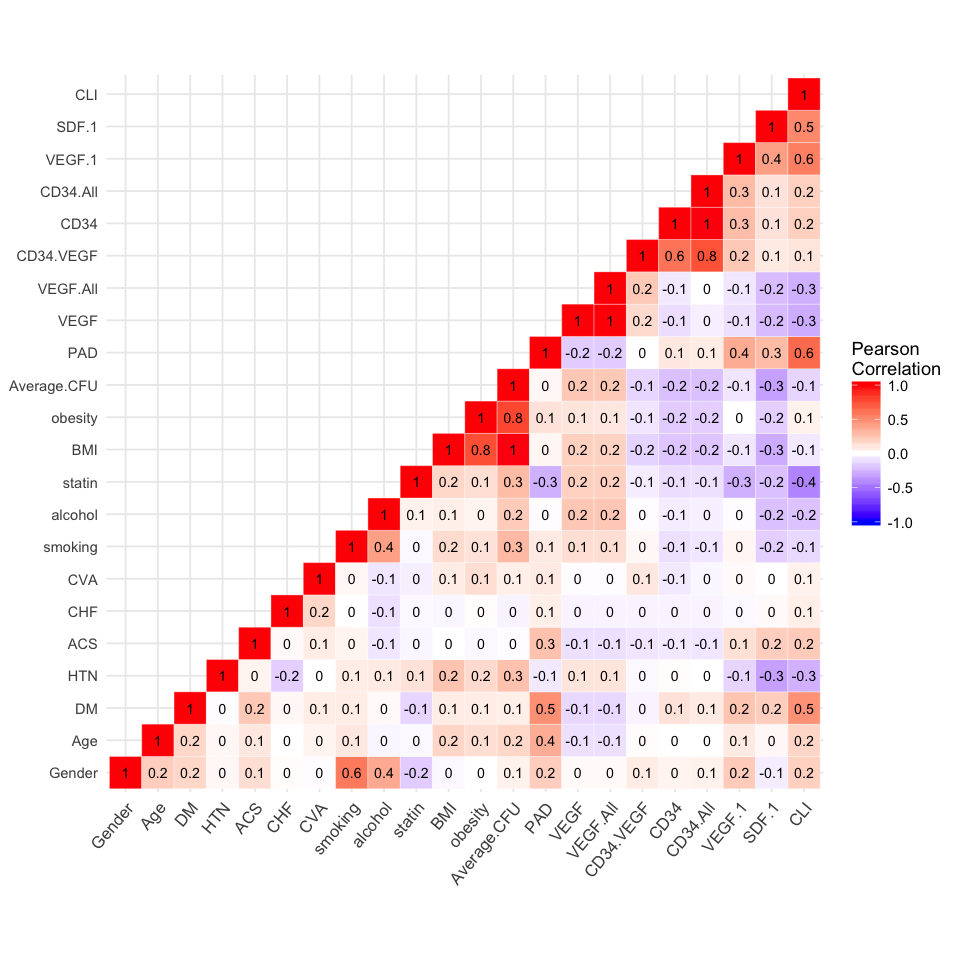

In [82]:
# 상관 계수를 살펴보자 

library(reshape2)

cormat <- round(cor(data[c(1,2,6:13,14,15,17, 16, 18,21, 19, 20 ,22, 23, 24,25)], use = 'complete.obs'),2)
cormat[lower.tri(cormat)]<- NA

cat("\n<상관관계 표와 Heat map>\n")
cormat
melted_cormat <- melt(cormat, na.rm = TRUE)

options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
    geom_tile(color = "white")+
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                         midpoint = 0, limit = c(-1,1), space = "Lab", 
                         name="Pearson\nCorrelation") +
    theme_minimal()+ 
    theme(axis.text.x = element_text(angle = 50, vjust = 1, 
                                     size = 10, hjust = 1) , 
          axis.title.x=element_blank(), 
          axis.title.y=element_blank())+
    coord_fixed() + geom_text(aes(Var2, Var1, label = round(value,1)), color = "black", size = 3)

---
# 요약
---

#### CLI 에 따른 집단에서 t-test 및 wilcoxon-test, chisq-test 를 한 결과
유의미한 변수들
- Age 0.026
- Gender 0.033
- DM 0.000
- HTN 0.006
- ACS 0.022
- alcohol 0.035
- statin 0.000
- PAD 0.000

다중분석을 고려하더라도, DM, HTN, statin, PAD 는 거의 확실하게 차이

#### CLI 에 따른 집단에서 로지스틱 회귀 결과 

적절한 모형은 변수 6개 정도의 
CLI ~ DM + statin + HTN + Gender + smoking + obesity 
로 생각되며 

- DM 
- HTN
- statin 

은 매우 강력한 영향

- Gender 
- smoking 
- obesity 

는 경계 수준 정도의 영향을 갖고 있다고 볼 수 있다. 

- ACS
- alcohol

도 경계 수준의 영향은 가지고 있는 것으로 생각된다. 